

---



### Descripción del trabajo

Este trabajo consiste en aplicar Redes Neuronales y modelos de Machine Learning supervisado para analizar y predecir el puntaje crediticio (credit score) de clientes utilizando un conjunto de datos realista. Se emplearán técnicas de preprocesamiento de datos, como la normalización y codificación de variables, y se evaluarán múltiples modelos y Redes Neuronales, para identificar el modelo más adecuado. También se realizarán métricas de desempeño para comprender mejor el comportamiento de cada modelo.

### Objetivo

El objetivo es desarrollar, implementar y comparar modelos de Machine Learning Supervisado, así como Redes Neuronales, para predecir con precisión el puntaje crediticio de clientes. Además, se busca identificar los factores más relevantes en la predicción y proporcionar una base sólida para la toma de decisiones en el ámbito financiero.



---



## Parte A: Pre-procesamiento



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

### Cargamos el dataset

Se esta trabajando en una empresa financiera global. A lo largo de los años, la empresa ha recopilado detalles básicos de cuentas bancarias y ha reunido mucha información relacionada con el crédito. La dirección quiere desarrollar un sistema inteligente para clasificar a las personas en rangos de puntuación crediticia, con el objetivo de reducir los esfuerzos manuales.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/delveeducation/datasets/refs/heads/main/credit_score.csv')

### Seleccionamos características relevantes y el target

In [ ]:
relevant_features = ['age', 'annual_income', 'monthly_inhand_salary', 'total_emi_per_month',
                     'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
                     'num_of_delayed_payment', 'outstanding_debt', 'credit_utilization_ratio',
                     'amount_invested_monthly', 'monthly_balance']

target = 'credit_score'

### Filtramos columnas

In [ ]:
data = data[relevant_features + [target]]

In [ ]:
data.head()

,age,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,num_of_delayed_payment,outstanding_debt,credit_utilization_ratio,amount_invested_monthly,monthly_balance,credit_score
0,23,19114.12,1824.8434,49.574947,3,4,3,4,7,809.98,26.822620,80.415300,312.49408,2
1,23,19114.12,1824.8434,49.574947,3,4,3,4,7,809.98,31.944960,118.280220,284.62915,2
2,23,19114.12,1824.8434,49.574947,3,4,3,4,7,809.98,28.609352,81.699524,331.20987,2
3,23,19114.12,1824.8434,49.574947,3,4,3,4,4,809.98,31.377861,199.458070,223.45131,2
4,23,19114.12,1824.8434,49.574947,3,4,3,4,4,809.98,24.797346,41.420155,341.48923,2


In [ ]:
data.columns

Index(['age', 'annual_income', 'monthly_inhand_salary', 'total_emi_per_month',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'num_of_delayed_payment', 'outstanding_debt',
       'credit_utilization_ratio', 'amount_invested_monthly',
       'monthly_balance', 'credit_score'],
      dtype='object')

In [ ]:
data.credit_score.dtype

dtype('int64')

### Transformamos el target a valores numéricos

In [ ]:
label_encoder = LabelEncoder()
data[target] = label_encoder.fit_transform(data[target])

In [ ]:
data.credit_score.unique()

array([2, 1, 0])

### Lidiamos con valores faltantes

In [ ]:
data.isnull().sum()

,0
age,0
annual_income,0
monthly_inhand_salary,0
total_emi_per_month,0
num_bank_accounts,0
num_credit_card,0
interest_rate,0
num_of_loan,0
num_of_delayed_payment,0
outstanding_debt,0


Utliza la media para rellenar los datos faltantes:

In [ ]:
data = data.fillna(data.mean())

### Separamos características y target

In [ ]:
X = data[['age', 'annual_income', 'monthly_inhand_salary', 'total_emi_per_month',
                     'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
                     'num_of_delayed_payment', 'outstanding_debt', 'credit_utilization_ratio',
                     'amount_invested_monthly', 'monthly_balance']]
y = data['credit_score']

### Normalizamos las características

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Dividimos en conjuntos de entrenamiento y prueba

Utiliza el 20% para el test size y un random state de 42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Parte B: Redes Neuronales

### Importamos lo necesario

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Creamos el modelo

In [ ]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
y_train

,credit_score
94882,1
88638,2
45621,0
45219,1
73357,0
...,...
6265,2
54886,1
76820,1
860,0


### Compilamos el modelo

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Entrenamos el modelo y guardamos el historial

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/100
2418/2418 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6387 - loss: 0.7943 - val_accuracy: 0.6634 - val_loss: 0.7385
Epoch 2/100
2418/2418 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6585 - loss: 0.7427 - val_accuracy: 0.6657 - val_loss: 0.7344
Epoch 3/100
2418/2418 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6624 - loss: 0.7322 - val_accuracy: 0.6683 - val_loss: 0.7279
Epoch 4/100
2418/2418 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6637 - loss: 0.7264 - val_accuracy: 0.6668 - val_loss: 0.7317
Epoch 5/100
2418/2418 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6643 - loss: 0.7276 - val_accuracy: 0.6691 - val_loss: 0.7265
Epoch 6/100
2418/2418 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6663 - loss: 0.7230 - val_accuracy: 0.6692 - val_loss: 0.7239
Epoch 7/100
2418/2418 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6652 - loss: 0.7206 - val_accuracy: 0.6722 - val_loss: 0.7230
Epoch 8/100
2418/2418 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6714 - loss

### Graficamos las pérdidas de entrenamiento y validación

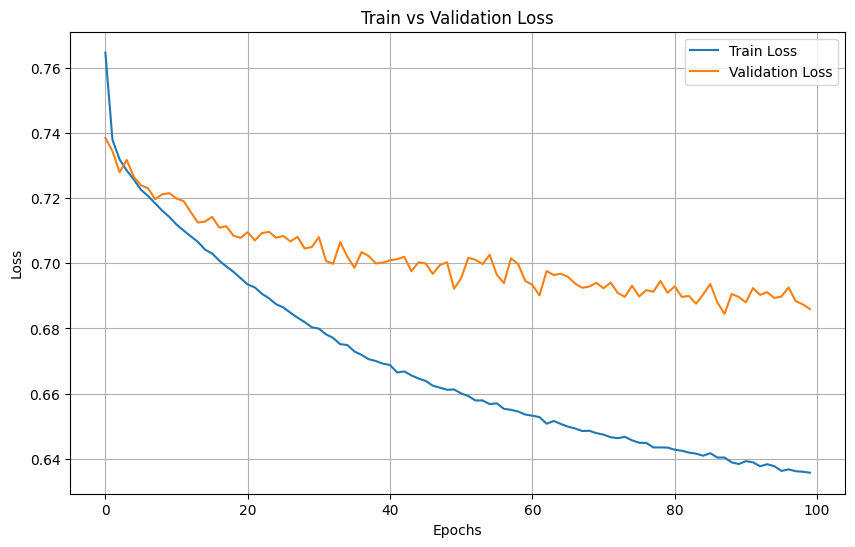

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

### Evaluamos el modelo

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Red Neuronal - Pérdida: {loss}, Accuracy: {accuracy}")

605/605 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6952 - loss: 0.6742
Red Neuronal - Pérdida: 0.6859588623046875, Accuracy: 0.6951913237571716


## Parte C: Modelos supervisados

In [ ]:
#implementacion de LDA para reducir la dimencionalidad
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
n_features = X_train.shape[1]
n_clasess = len(np.unique(y_train))

lda = LDA(n_components=min(n_features, n_clasess - 1))
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [ ]:
#Implementar el modelo SVM
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train_lda, y_train)

SVC()

In [ ]:
#evaluar el modelo
predictions = svm_model.predict(X_test_lda)
accuracy_svm = accuracy_score(y_test, predictions)
print(f'La precision del modelo es: {accuracy_svm:.2f}')

La precision del modelo es: 0.65


In [ ]:
#implementacion de SVM sin LDA
svm_model2 = SVC(kernel='rbf', C=1.0)
svm_model2.fit(X_train, y_train)

SVC()

In [ ]:
#evaluacion del modelo sin LDA
prediction2 = svm_model2.predict(X_test)
accuracy_svm2 = accuracy_score(y_test, prediction2)
print(f'La precision del modelo sin uso de LDA es: {accuracy_svm2:.2f}')

La precision del modelo sin uso de LDA es: 0.67


In [ ]:
#Implementacion de KNN con Cross Validation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

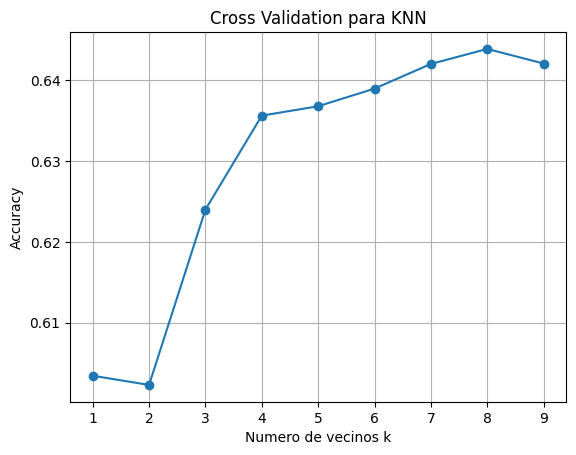

In [ ]:
#Cross validation
k_val = range(1,10)
k_scores = []

for k in k_val:
  model = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(model, X_train_lda, y_train, cv=5, scoring='accuracy')
  k_scores.append(scores.mean())

#graficar los resultados
plt.plot(k_val, k_scores, marker='o')
plt.xlabel('Numero de vecinos k')
plt.ylabel('Accuracy')
plt.title('Cross Validation para KNN')
plt.grid(True)
plt.show()

In [ ]:
#entrenar el modelo con el meojr K
k_best = 8 #la grafica nos muestra que con k=8 es el mas optimo de vecinos
knn_model = KNeighborsClassifier(n_neighbors=k_best, metric='euclidean')
knn_model.fit(X_train_lda, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [ ]:
#evaluar el modelo KNN
predioction_knn = knn_model.predict(X_test_lda)
accuracy_knn = accuracy_score(y_test, predioction_knn)
print(f'La precision del modelo con KNN es: {accuracy_knn:.2f}')

La precision del modelo con KNN es: 0.65


In [ ]:
#Implementacion de KNN sin LDA
knn_model2 = KNeighborsClassifier(n_neighbors=k_best, metric='euclidean')
knn_model2.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [ ]:
#evaluar el modelo KNN sin LDA
prediction_knn2 = knn_model2.predict(X_test)
accuracy_knn2 = accuracy_score(y_test, prediction_knn2)
print(f'La precision del modelo de KNN sin LDA es: {accuracy_knn2:.2f}')

La precision del modelo de KNN sin LDA es: 0.70


## Conclusiones.

Al aplicar el modelo KNN con el número óptimo de vecinos k=8 y sin utilizar LDA, se obtiene una precisión del 70%.

Por otro lado al evaluar el modelo SVM sin el uso de LDA, la precisión alcanza un 67%, superando al modelo de SVM que utiliza LDA, el cual alcanza solo un 65%.

Estos resultados sugieren que la reducción de dimensionalidad mediante LDA no mejora significativamente el rendimiento de los modelos en este caso en particular, de hecho, parece que los datos no requieren una reducción de dimensionalidad para optimizar su desempeño.